# Coronary Heart Disease


A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- *sbp*	-	systolic blood pressure
- *tobacco*	-	cumulative tobacco (kg)
- *ldl*	-	low densiity lipoprotein cholesterol
- *adiposity* - https://en.m.wikipedia.org/wiki/Body_adiposity_index
- *famhist*	-	family history of heart disease (Present, Absent)
- *typea*	-	type-A behavior
- *obesity* - https://en.wikipedia.org/wiki/Obesity
- *alcohol*	-	current alcohol consumption
- *age*	-	age at onset
- *chd*	-	response, coronary heart disease

The dataset is taken from 

http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data

Description is available at

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt

### Step 1: Loading the dataset

- Load the data file SAheart.data. This is csv file.

In [5]:
import pandas as pd

In [6]:
heart_df=pd.read_csv('C:/Users/Meenakshi/Desktop/Machine Learning IIMB/data/SAheart.data')

### Stpe 2: Finding Metadata 

- Find how many rows and columns available in the dataset.
- Find the columns types of the dataset.

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


### Step 4: Encode the categorical variable *famhist* using OHE (One Hot Encoding)

In [8]:
heart_df.famhist.unique()

array(['Present', 'Absent'], dtype=object)

In [9]:
heart_encoded_df=pd.get_dummies(heart_df,
                           columns=['famhist'],
                        )

In [10]:
heart_encoded_df.tail(5)

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
457,459,214,0.4,5.98,31.72,64,28.45,0.00,58,0,1,0
458,460,182,4.2,4.41,32.10,52,28.61,18.72,52,1,1,0
459,461,108,3.0,1.59,15.23,40,20.09,26.64,55,0,1,0
460,462,118,5.4,11.61,30.79,64,27.35,23.97,40,0,1,0
461,463,132,0.0,4.82,33.41,62,14.70,0.00,46,1,0,1


### Step 5: Split the dataset into train and test 

Note: Split using 80:20 rule. Use random_state value 100.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_features=list(heart_encoded_df.columns)

In [13]:
X_features.remove('chd')

In [14]:
X_train, X_test, \
Y_train, Y_test=train_test_split(heart_encoded_df[X_features],
                                heart_encoded_df.chd,
                                train_size=0.8,
                                random_state=100)

In [15]:
X_train.shape

(369, 11)

In [16]:
X_test.shape

(93, 11)

### Step 6: Build a Classification Model

Note: Use any one of the following models:

1. Logistic Regression
2. KNN
3. Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree_v2=DecisionTreeClassifier(max_depth=7)

In [19]:
tree_v2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
Y_pred_tree=tree_v2.predict(X_test)

In [21]:
Y_df_v1=pd.DataFrame({"Actual": Y_test,
                     "Predicted":Y_pred_tree})

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm_tree=confusion_matrix(Y_test, Y_pred_tree,[1,0])

In [24]:
cm_tree

array([[10, 28],
       [19, 36]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(Y_df_v1.Actual,
                     Y_df_v1.Predicted))

              precision    recall  f1-score   support

           0       0.56      0.65      0.61        55
           1       0.34      0.26      0.30        38

    accuracy                           0.49        93
   macro avg       0.45      0.46      0.45        93
weighted avg       0.47      0.49      0.48        93



In [27]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm_tree,
          annot=True,
          fmt='0.0f',
          xticklabels=['Left', "No Left"],
          yticklabels=['Left', "No Left"]);
plt.xlabel("Predicted")
plt.ylabel("Actual");

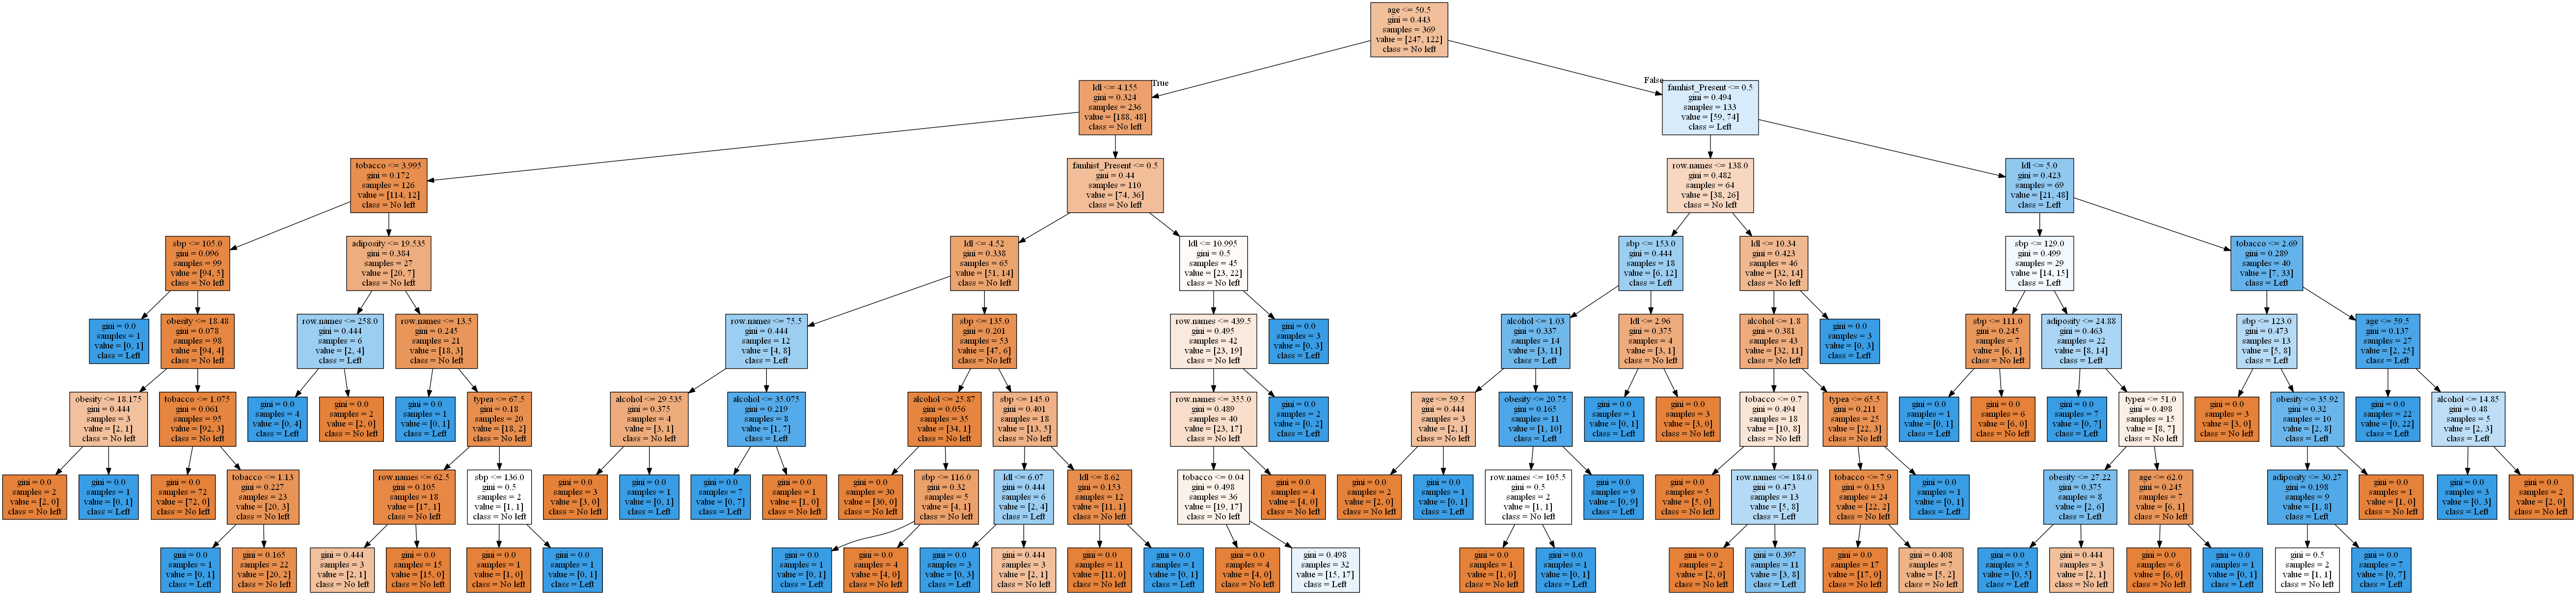

In [28]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
export_graphviz( tree_v2,
               out_file ='heart.dot',
               feature_names = X_features,
               class_names=['No left', 'Left'],
               filled=True )
tree_graph=pdot.graph_from_dot_file("heart.dot")
tree_graph.write_png("heart.png")
from IPython import display
display.Image("heart.png")

### Step 7: Predict on the test set to find the predicted probability for *chd* classes

### Step 8: Find the ROC AUC Score

### Step 9: Find the optimal probabililty cutoff using the following costs for FPs and FNs

- FP_Cost = 1.0
- FN_Cost = 1.0

Note: The cost for false positive and false negatives are same.

### Step 10: Predict the labels on test set using the optimal cutoff probability value.

Note: Use the cutoff probability to predict if the person is likely to have chd or not.


### Step 11: Create confusion matrix

### Step 12: Find the Precision and recall for the *chd* classes.